<a href="https://colab.research.google.com/github/furkanardadincer/CreditRiskPrediction/blob/main/FCNN_KrediRiskTahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mount Google Drive
df = pd.read_csv('/content/drive/MyDrive/giveMeSomeCredit/archive/cs-training.csv')

In [4]:
# Hedef ve Özellikleri Ayır
X = df.drop(['Unnamed: 0', 'SeriousDlqin2yrs'], axis=1)
y = df['SeriousDlqin2yrs']

In [5]:
# Eksik Değerleri Doldur
X['MonthlyIncome'].fillna(X['MonthlyIncome'].median(), inplace=True)
X['NumberOfDependents'].fillna(0, inplace=True)

<ipython-input-5-0a7f6b546815>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['MonthlyIncome'].fillna(X['MonthlyIncome'].median(), inplace=True)
<ipython-input-5-0a7f6b546815>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [6]:
# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Eğitim/Test ayırımı
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # aşırı öğrenmeyi engeller
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary sınıflama
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [11]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9255 - loss: 0.2580 - val_accuracy: 0.9327 - val_loss: 0.1922
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9322 - loss: 0.2024 - val_accuracy: 0.9330 - val_loss: 0.1908
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9343 - loss: 0.1978 - val_accuracy: 0.9332 - val_loss: 0.1895
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9324 - loss: 0.1992 - val_accuracy: 0.9334 - val_loss: 0.1890
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9355 - loss: 0.1929 - val_accuracy: 0.9339 - val_loss: 0.1892
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9347 - loss: 0.1944 - val_accuracy: 0.9341 - val_loss: 0.1898
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9350 - loss: 0.1930 - val_accuracy: 0.9335 - val_loss: 0.1889
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9331 - loss: 0.196

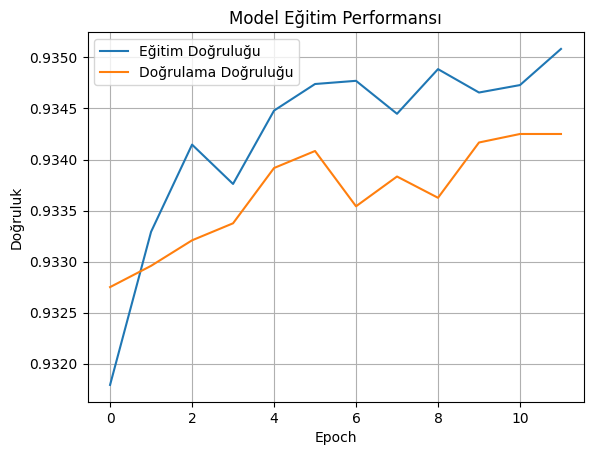

In [12]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model Eğitim Performansı')
plt.legend()
plt.grid()
plt.show()

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


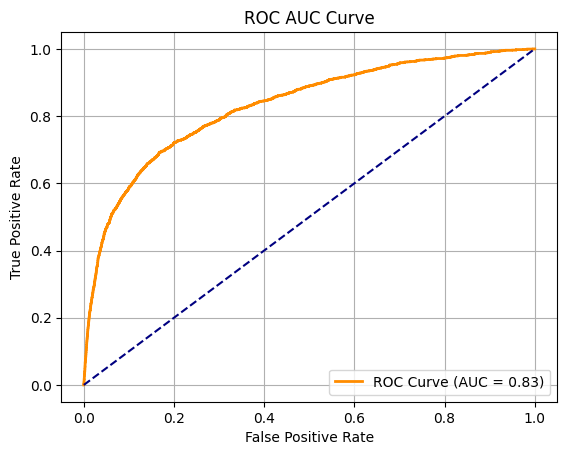

In [13]:
# ROC-AUC Eğrisi
y_proba = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [14]:
y_pred = (y_proba > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     28044
           1       0.57      0.14      0.22      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.56      0.59     30000
weighted avg       0.92      0.94      0.92     30000

